In [76]:
# 导入模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
# 设置汉字字体 优先使用楷体
plt.rcParams['font.sans-serif'] = ['KaiTi'] 

### 数据处理

- 读取文件

In [78]:
# 读取文件
data = pd.read_csv('./data.csv',encoding='ISO-8859-1')
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [79]:
# 查看数据
data.shape

(541909, 8)

In [80]:
# 查看数据的信息
# 注意观察数据类型 是否有缺失值
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- 处理缺失值

In [81]:
# 查看是否有缺失值
# data['Description'].isna().any() 
# 由于描述不影响我们分析 删除这一列
del data['Description']
# 再次查看数据
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [82]:
# 处理第二列缺失值 
data['CustomerID'].isna().any()
# 由于CustomerID很重要 所以用unknown填充
data['CustomerID'] = data['CustomerID'].astype('str')
data['CustomerID'] = data['CustomerID'].fillna('unknown')

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   541909 non-null  object 
 6   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.9+ MB


- 日期格式的转换


In [84]:
data['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 541909, dtype: object

In [85]:
data['date'] = [x.split(' ')[0] for x in data['InvoiceDate']]
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].astype('datetime64[M]')
data[['date','month']]

date      month
0      2010-12-01 2010-12-01
1      2010-12-01 2010-12-01
2      2010-12-01 2010-12-01
3      2010-12-01 2010-12-01
4      2010-12-01 2010-12-01
...           ...        ...
541904 2011-12-09 2011-12-01
541905 2011-12-09 2011-12-01
541906 2011-12-09 2011-12-01
541907 2011-12-09 2011-12-01
541908 2011-12-09 2011-12-01

[541909 rows x 2 columns]

- 去重

In [86]:
data = data.drop_duplicates()
data.shape

(536639, 9)

- 异常值处理

In [87]:
data.describe(include='O')
data.describe()

Quantity      UnitPrice
count  536639.000000  536639.000000
mean        9.619500       4.632660
std       219.130206      97.233299
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

In [88]:
data[ (data['Quantity'] < 0)  | (data['UnitPrice'] < 0) ] 

InvoiceNo StockCode  Quantity      InvoiceDate  UnitPrice CustomerID  \
141      C536379         D        -1   12/1/2010 9:41      27.50    14527.0   
154      C536383    35004C        -1   12/1/2010 9:49       4.65    15311.0   
235      C536391     22556       -12  12/1/2010 10:24       1.65    17548.0   
236      C536391     21984       -24  12/1/2010 10:24       0.29    17548.0   
237      C536391     21983       -24  12/1/2010 10:24       0.29    17548.0   
...          ...       ...       ...              ...        ...        ...   
540449   C581490     23144       -11   12/9/2011 9:57       0.83    14397.0   
541541   C581499         M        -1  12/9/2011 10:28     224.69    15498.0   
541715   C581568     21258        -5  12/9/2011 11:57      10.95    15311.0   
541716   C581569     84978        -1  12/9/2011 11:58       1.25    17315.0   
541717   C581569     20979        -5  12/9/2011 11:58       1.25    17315.0   

               Country       date      month  
141     United Kingdom 2010-12-01 2010-12-01  
154     United Kingdom 2010-12-01 2010-12-01  
235     United Kingdom 2010-12-01 2010-12-01  
236     United Kingdom 2010-12-01 2010-12-01  
237     United Kingdom 2010-12-01 2010-12-01  
...                ...        ...        ...  
540449  United Kingdom 2011-12-09 2011-12-01  
541541  United Kingdom 2011-12-09 2011-12-01  
541715  United Kingdom 2011-12-09 2011-12-01  
541716  United Kingdom 2011-12-09 2011-12-01  
541717  United Kingdom 2011-12-09 2011-12-01  

[10589 rows x 9 columns]

In [89]:
# 除去异常数据
data = data[ (data['Quantity'] > 0)  & (data['UnitPrice'] > 0) ] 
data[ (data['Quantity'] < 0)  | (data['UnitPrice'] < 0) ] 

Empty DataFrame
Columns: [InvoiceNo, StockCode, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, date, month]
Index: []

### 用户分类

- 首先计算R值

In [96]:
# 计算R值
data.describe(include='O')
R_value  = data.groupby('CustomerID')['date'].max()
R_value = (data['date'].max() - R_value).dt.days  # 这里将2011-12-9作为当前日期进行计算
R_value

CustomerID
12346.0    325
12347.0      2
12348.0     75
12349.0     18
12350.0    310
          ... 
18281.0    180
18282.0      7
18283.0      3
18287.0     42
nan          0
Name: date, Length: 4339, dtype: int64

- 计算F

In [124]:
# 将2010-12-1至2011-12-9视为F值的区间段，计算每个客户所下单的数量
# Pandas nunique() 用于获取唯一值的统计次数
F_value = data.groupby('CustomerID')['InvoiceNo'].nunique()
F_value

CustomerID
12346.0       1
12347.0       7
12348.0       4
12349.0       1
12350.0       1
           ... 
18281.0       1
18282.0       2
18283.0      16
18287.0       3
nan        1428
Name: InvoiceNo, Length: 4339, dtype: int64

- 计算M值

In [103]:
# 首先计算每个订单的消费金额
data['amount'] = data['Quantity'] * data['UnitPrice']
# 再计算M值 
M_value   = data.groupby('CustomerID')['InvoiceNo'].nunique()
M_value  = data.groupby('CustomerID')['amount'].sum()
M_value 

CustomerID
12346.0      77183.60
12347.0       4310.00
12348.0       1797.24
12349.0       1757.55
12350.0        334.40
              ...    
18281.0         80.82
18282.0        178.05
18283.0       2045.53
18287.0       1837.28
nan        1754901.91
Name: amount, Length: 4339, dtype: float64

In [104]:
R_value.describe()

count    4339.000000
mean       92.038258
std       100.010502
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: date, dtype: float64

- 绘图观察

<AxesSubplot:>

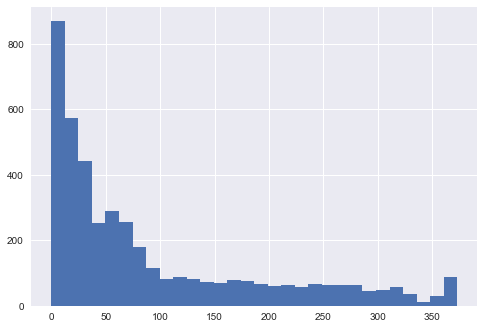

In [107]:
plt.style.use('seaborn')
R_value.hist(bins=30)

In [108]:
M_value.describe()

count    4.339000e+03
mean     2.452537e+03
std      2.808589e+04
min      3.750000e+00
25%      3.065050e+02
50%      6.685800e+02
75%      1.660890e+03
max      1.754902e+06
Name: amount, dtype: float64

<AxesSubplot:>

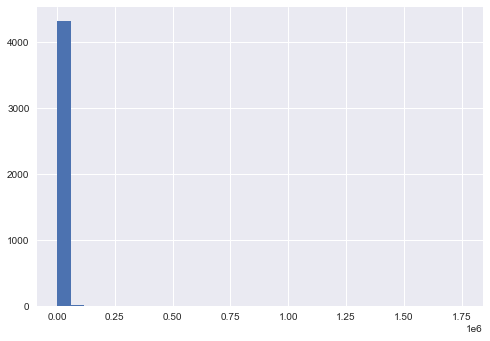

In [109]:
M_value.hist(bins=30) # 不寻常

<AxesSubplot:>

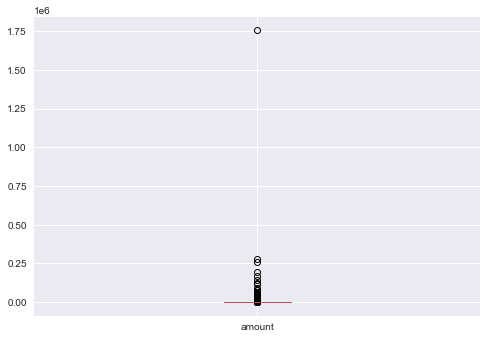

In [112]:
M_value.plot.box()

<AxesSubplot:>

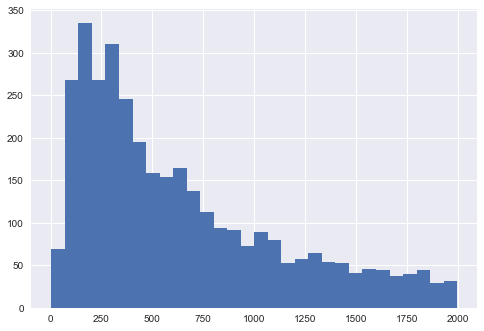

In [127]:
M_value[M_value < 2000].hist(bins=30)

In [130]:
# 分位数 观察出异常值还是很严重
F_value.quantile([0.1,0.2,0.3,0.4,0.5,0.9,1])
F_value.plot.box()

<AxesSubplot:>

<AxesSubplot:>

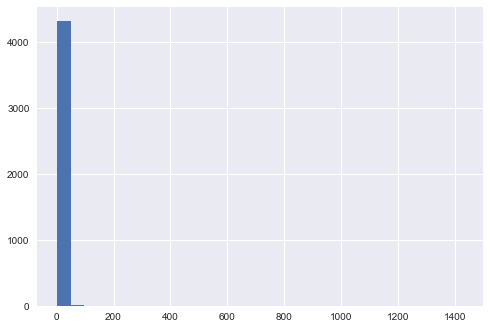

In [131]:
F_value.hist(bins = 30)

<AxesSubplot:>

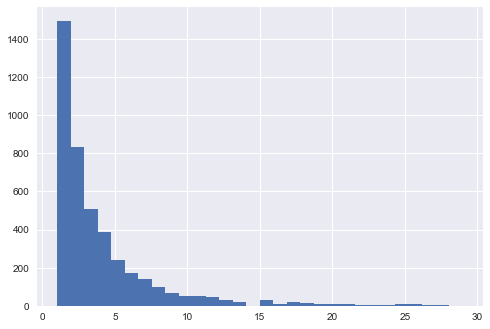

In [132]:
F_value[F_value<30].hist(bins = 30)

- 分等级


In [133]:
# 每个指标下都分为五个等级
R_bins = [0,30,90,180,360,720]
F_bins = [1,2,5,10,20,5000]
M_bins = [0,500,2000,5000,10000,200000]

In [135]:
# R值分类统计
R_score  = pd.cut(R_value,bins=R_bins,labels=[5,4,3,2,1],right=False)
R_score

CustomerID
12346.0    2
12347.0    5
12348.0    4
12349.0    5
12350.0    2
          ..
18281.0    2
18282.0    5
18283.0    5
18287.0    4
nan        5
Name: date, Length: 4339, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [137]:
# R值分类统计
F_score  = pd.cut(F_value,bins=F_bins,labels=[1,2,3,4,5],right=False)
F_score

CustomerID
12346.0    1
12347.0    3
12348.0    2
12349.0    1
12350.0    1
          ..
18281.0    1
18282.0    2
18283.0    4
18287.0    2
nan        5
Name: InvoiceNo, Length: 4339, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [138]:
# M值分类统计
M_score  = pd.cut(M_value,bins=M_bins,labels=[1,2,3,4,5],right=False)
M_score

CustomerID
12346.0      5
12347.0      3
12348.0      2
12349.0      2
12350.0      1
          ... 
18281.0      1
18282.0      1
18283.0      3
18287.0      2
nan        NaN
Name: amount, Length: 4339, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

- 生成新的数据框

In [141]:
rfm = pd.concat([R_score,F_score,M_score],axis=1)
rfm.rename(columns={'date':'R_score','InvoiceNo':'F_score','amount':'M_score'},inplace=True)
rfm

R_score F_score M_score
CustomerID                        
12346.0          2       1       5
12347.0          5       3       3
12348.0          4       2       2
12349.0          5       1       2
12350.0          2       1       1
...            ...     ...     ...
18281.0          2       1       1
18282.0          5       2       1
18283.0          5       4       3
18287.0          4       2       2
nan              5       5     NaN

[4339 rows x 3 columns]

In [142]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346.0 to nan
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   R_score  4339 non-null   category
 1   F_score  4339 non-null   category
 2   M_score  4336 non-null   category
dtypes: category(3)
memory usage: 176.3+ KB


In [143]:
# 改变数据类型
rfm['R_score'] = rfm['R_score'].astype('float')
rfm['F_score'] = rfm['F_score'].astype('float')
rfm['M_score'] = rfm['M_score'].astype('float')
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346.0 to nan
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R_score  4339 non-null   float64
 1   F_score  4339 non-null   float64
 2   M_score  4336 non-null   float64
dtypes: float64(3)
memory usage: 264.6+ KB


In [144]:
rfm.head()

R_score  F_score  M_score
CustomerID                           
12346.0         2.0      1.0      5.0
12347.0         5.0      3.0      3.0
12348.0         4.0      2.0      2.0
12349.0         5.0      1.0      2.0
12350.0         2.0      1.0      1.0

In [146]:
rfm.describe()

R_score      F_score      M_score
count  4339.000000  4339.000000  4336.000000
mean      3.821618     2.028117     1.885609
std       1.174880     0.997989     0.951810
min       1.000000     1.000000     1.000000
25%       3.000000     1.000000     1.000000
50%       4.000000     2.000000     2.000000
75%       5.000000     3.000000     2.000000
max       5.000000     5.000000     5.000000

In [145]:
# np.where(condition,x,y) 当where内有三个参数时，第一个参数表示条件，当条件成立时where方法返回x，当条件不成立时where返回y
rfm['R'] = np.where(rfm['R_score'] > 3.82,'高','低')
rfm['F'] = np.where(rfm['F_score']>2.03,'高','低')
rfm['M'] = np.where(rfm['M_score']>1.89,'高','低')
rfm

R_score  F_score  M_score  R  F  M
CustomerID                                    
12346.0         2.0      1.0      5.0  低  低  高
12347.0         5.0      3.0      3.0  高  高  高
12348.0         4.0      2.0      2.0  高  低  高
12349.0         5.0      1.0      2.0  高  低  高
12350.0         2.0      1.0      1.0  低  低  低
...             ...      ...      ... .. .. ..
18281.0         2.0      1.0      1.0  低  低  低
18282.0         5.0      2.0      1.0  高  低  低
18283.0         5.0      4.0      3.0  高  高  高
18287.0         4.0      2.0      2.0  高  低  高
nan             5.0      5.0      NaN  高  高  低

[4339 rows x 6 columns]

In [147]:
# 将三个指标结合
rfm['RFM'] = rfm['R'] + rfm['F'] + rfm['M']
rfm

R_score  F_score  M_score  R  F  M  RFM
CustomerID                                         
12346.0         2.0      1.0      5.0  低  低  高  低低高
12347.0         5.0      3.0      3.0  高  高  高  高高高
12348.0         4.0      2.0      2.0  高  低  高  高低高
12349.0         5.0      1.0      2.0  高  低  高  高低高
12350.0         2.0      1.0      1.0  低  低  低  低低低
...             ...      ...      ... .. .. ..  ...
18281.0         2.0      1.0      1.0  低  低  低  低低低
18282.0         5.0      2.0      1.0  高  低  低  高低低
18283.0         5.0      4.0      3.0  高  高  高  高高高
18287.0         4.0      2.0      2.0  高  低  高  高低高
nan             5.0      5.0      NaN  高  高  低  高高低

[4339 rows x 7 columns]

- 总结数据

In [148]:
def rfm2grade(x): # FMF
    if x=='高高高':
        return '高价值客户'
    elif x=='高低高':
        return '重点发展客户'
    elif x=='低高高':
        return '重点保持客户'
    elif x=='低低高':
        return '重点挽留客户'
    elif x=='高高低':
        return '一般价值客户'
    elif x=='高低低':
        return '一般发展客户'
    elif x=='低高低':
        return '一般保持客户'
    else:
        return '一般挽留客户'  

In [149]:
rfm['用户等级'] = rfm['RFM'].apply(rfm2grade)
rfm

R_score  F_score  M_score  R  F  M  RFM    用户等级
CustomerID                                                 
12346.0         2.0      1.0      5.0  低  低  高  低低高  重点挽留客户
12347.0         5.0      3.0      3.0  高  高  高  高高高   高价值客户
12348.0         4.0      2.0      2.0  高  低  高  高低高  重点发展客户
12349.0         5.0      1.0      2.0  高  低  高  高低高  重点发展客户
12350.0         2.0      1.0      1.0  低  低  低  低低低  一般挽留客户
...             ...      ...      ... .. .. ..  ...     ...
18281.0         2.0      1.0      1.0  低  低  低  低低低  一般挽留客户
18282.0         5.0      2.0      1.0  高  低  低  高低低  一般发展客户
18283.0         5.0      4.0      3.0  高  高  高  高高高   高价值客户
18287.0         4.0      2.0      2.0  高  低  高  高低高  重点发展客户
nan             5.0      5.0      NaN  高  高  低  高高低  一般价值客户

[4339 rows x 8 columns]

### 分类结果

In [181]:
rfm['用户等级'].value_counts()
rfm['用户等级']

CustomerID
12346.0    重点挽留客户
12347.0     高价值客户
12348.0    重点发展客户
12349.0    重点发展客户
12350.0    一般挽留客户
            ...  
18281.0    一般挽留客户
18282.0    一般发展客户
18283.0     高价值客户
18287.0    重点发展客户
nan        一般价值客户
Name: 用户等级, Length: 4339, dtype: object

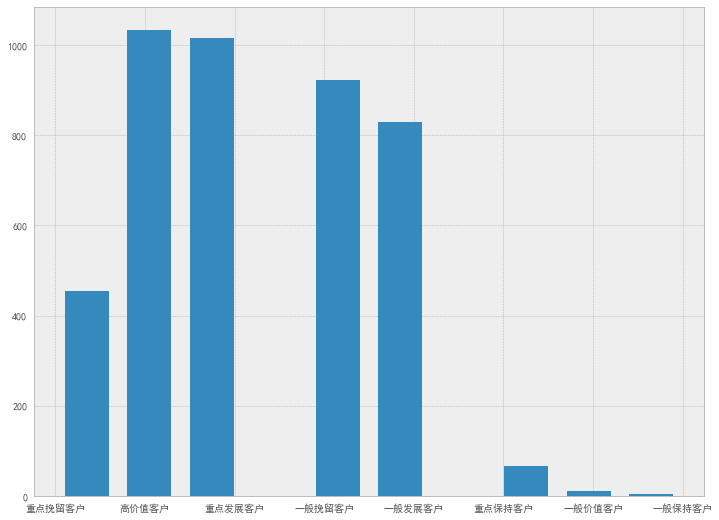

In [192]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(12,9)) 
plt.hist(rfm['用户等级'], align='mid',rwidth=0.7)
plt.show()


In [197]:
# 分类占比 每一个分类的值占总的列表
rfm['用户等级'].value_counts() / rfm['用户等级'].value_counts().sum()


高价值客户     0.238304
重点发展客户    0.234386
一般挽留客户    0.212722
一般发展客户    0.191058
重点挽留客户    0.104863
重点保持客户    0.015211
一般价值客户    0.002305
一般保持客户    0.001152
Name: 用户等级, dtype: float64

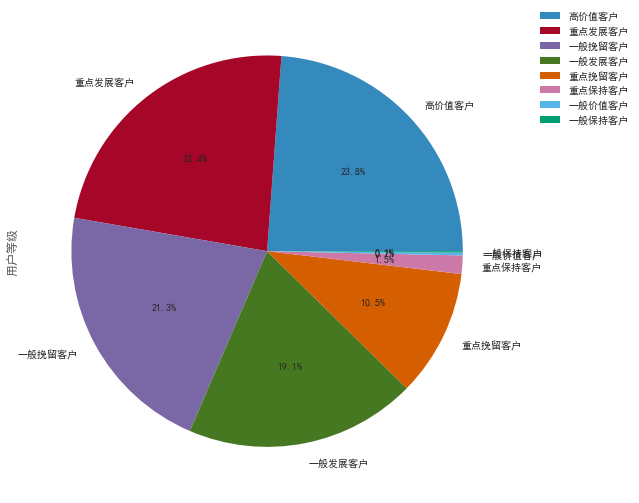

In [222]:
# 绘制饼图
rfm['用户等级'].value_counts().plot(kind='pie',figsize=(15, 9),autopct='%.1f%%',textprops={'fontsize':10},subplots=True)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)  # 添加注解